# Blood_Donations_Prediction

## Task-1

## Business Case:

The Blood Donation Prediction aims to create a meachine learning model which can predict whether or not a donor will give blood the next time the vehicle comes to campus in March 2007

## Domain Analysis

1.**Unnamed: 0 :** You can ignore this column  
2.**Months since Last Donation**: this is the number of monthis since this donor's most recent donation.  
3.**Number of Donations**: this is the total number of donations that the donor has made.  
4.**Total Volume Donated**: this is the total amound of blood that the donor has donated in cubuc centimeters.  
5.**Months since First Donation**: this is the number of months since the donor's first donation  
6.**Made Donation in March 2007**: a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).  


## Importing Libraries

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [137]:
df = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


Now , we can understand the data and its shape(576,6)

This dataset contains 576 data points with 5 independent features and 1 target feature(Made Donation in March 2007).

In [138]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


In [139]:
#pd.set_option('display.max_rows',None)
#df

## Basic Checks

In [140]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [141]:
df.tail()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0
575,72,1,250,72,0


In [142]:
df.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Months since Last Donation   576 non-null    int64
 1   Number of Donations          576 non-null    int64
 2   Total Volume Donated (c.c.)  576 non-null    int64
 3   Months since First Donation  576 non-null    int64
 4   Made Donation in March 2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


From the above information we can see that the dataset contains all integer values.

In [144]:
df.nunique()

Months since Last Donation     29
Number of Donations            29
Total Volume Donated (c.c.)    29
Months since First Donation    75
Made Donation in March 2007     2
dtype: int64

## EDA(Exploratory Data Analysis)

In [145]:
df.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [146]:
df.rename(columns={'Months since Last Donation':'months_since_last_donation','Number of Donations':'no_of_donations','Total Volume Donated (c.c.)':'total_volume_donated','Months since First Donation':'months_since_first_donation','Made Donation in March 2007':'made_donation_in_march_2007'
                },inplace=True)

In [147]:
df.made_donation_in_march_2007.value_counts()

made_donation_in_march_2007
0    438
1    138
Name: count, dtype: int64

### Univariate Analysis

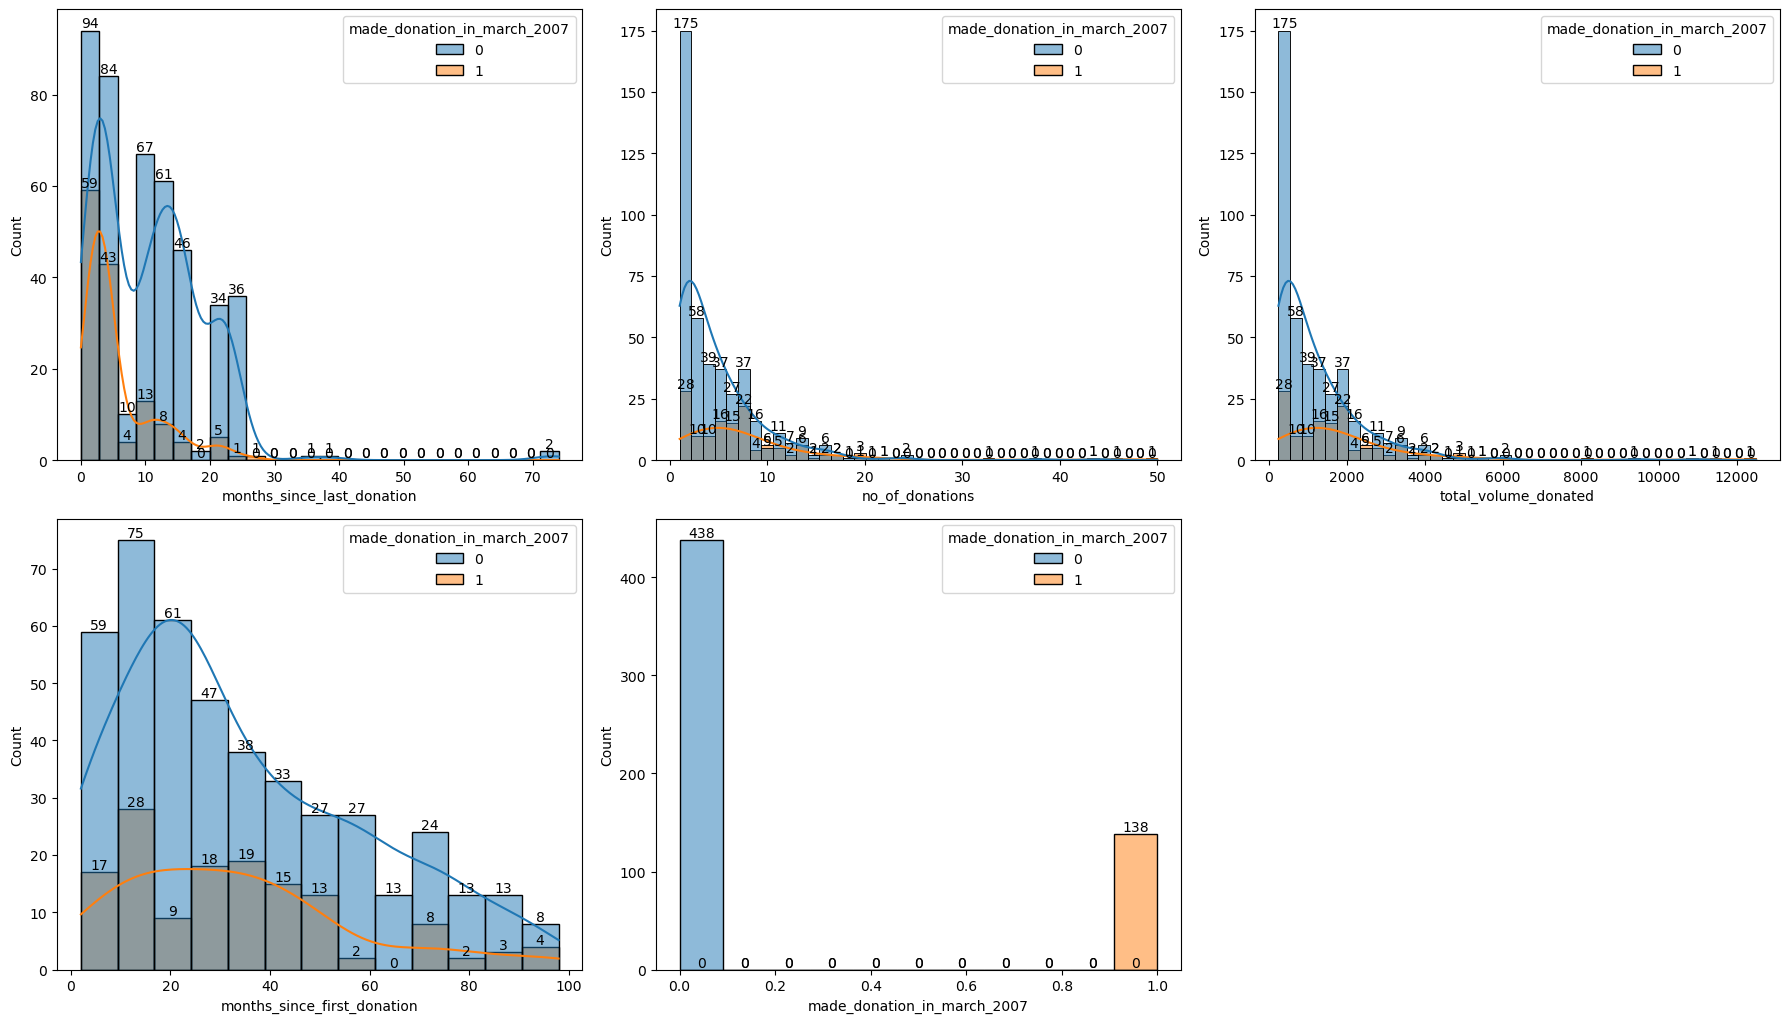

In [148]:
plt.figure(figsize=(18,15))
plotnumber = 1

for i in df:
    plt.subplot(3,3,plotnumber)
    ax = sns.histplot(x = df[i],  hue = df['made_donation_in_march_2007'], kde = True)
    plotnumber = plotnumber+1
    for i in ax.containers:
        ax.bar_label(i)
    
plt.tight_layout()

**Insights**:

In [149]:
#**Months since last donation :**  We can observe that 5 months before 18% of members donated blood where as 30% of people didn't donate blood. 
#**No of donations            :** 30% of the people donated only once or twice.  
#**Total vomlume donated(c.c) :** 30% of the people donated only 300c.c blood approximately.  
#**Months since first donation:** Nearly 20% of the people donoted blood for the first time between 10-20 months.  
#**Made donation in march 2007:** We can observe that only 24% of the people donated blood in march 2007.  

In [150]:
#pip install sweetviz

In [151]:
#import sweetviz as sv
#my_report = sv.analyze(data)
#my_report.show_html()

### Bivariate Analysis

In [152]:
df.columns

Index(['months_since_last_donation', 'no_of_donations', 'total_volume_donated',
       'months_since_first_donation', 'made_donation_in_march_2007'],
      dtype='object')

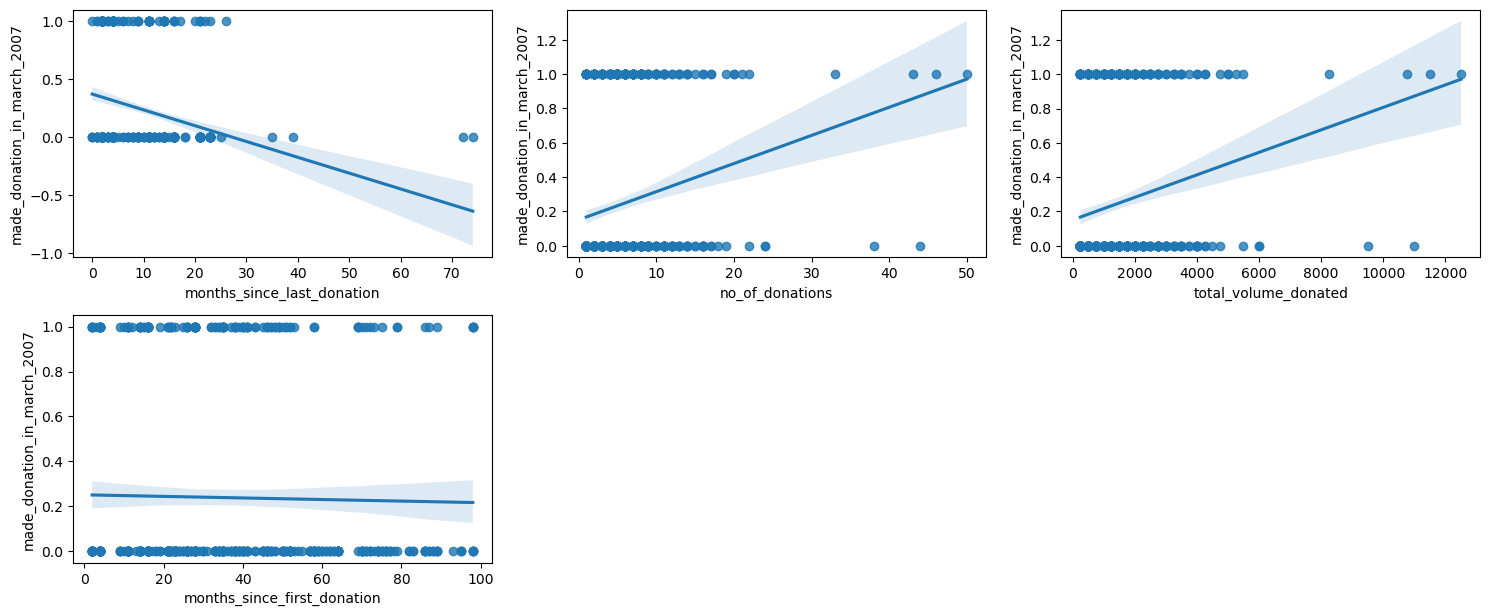

In [153]:
plt.figure(figsize=(15,15))
plotnumber = 1

for i in df.drop('made_donation_in_march_2007',axis=1):
    plt.subplot(5,3,plotnumber)
    sns.regplot(x = df[i],y = df['made_donation_in_march_2007'])
    plotnumber = plotnumber+1
    
plt.tight_layout()

<Axes: xlabel='months_since_last_donation', ylabel='no_of_donations'>

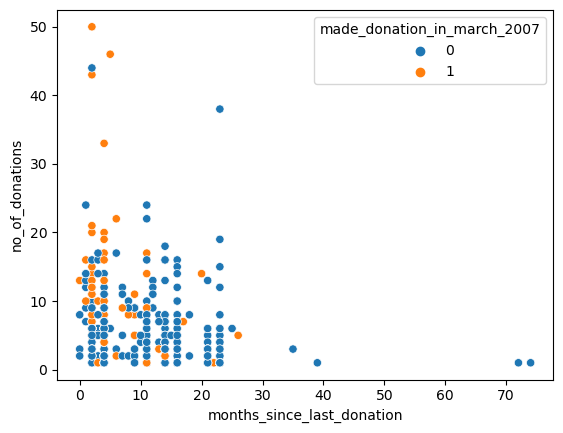

In [154]:
sns.scatterplot(x = df['months_since_last_donation'],y = df['no_of_donations'], hue =df['made_donation_in_march_2007'])

### Multivariate Analysis

E:\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


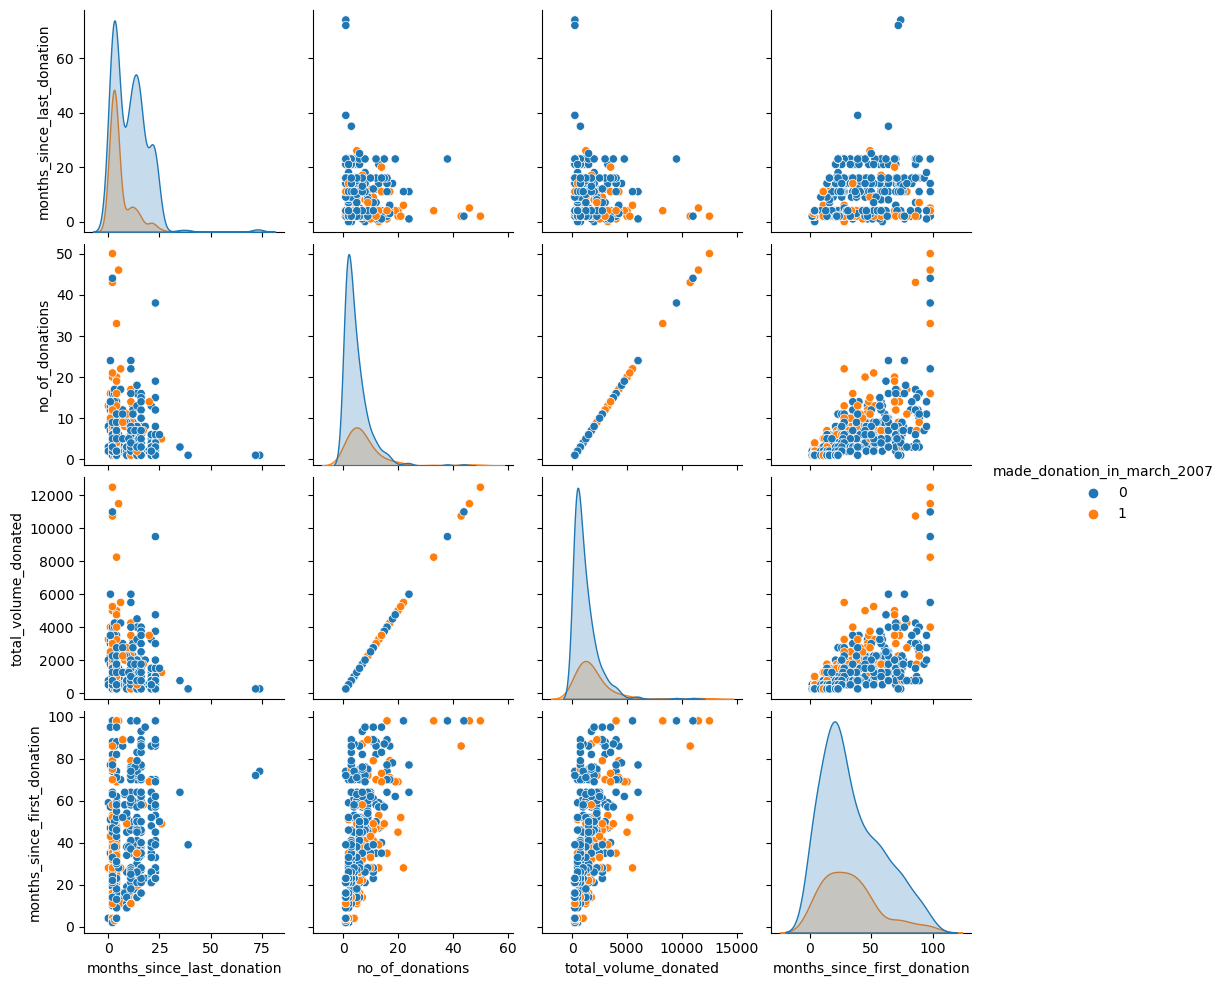

In [155]:
sns.pairplot(df, hue = 'made_donation_in_march_2007')

## Data Preprocessing

In [156]:
df.isnull().sum()

months_since_last_donation     0
no_of_donations                0
total_volume_donated           0
months_since_first_donation    0
made_donation_in_march_2007    0
dtype: int64

We can observe that there are no null values in above data.

### Handling Outliers

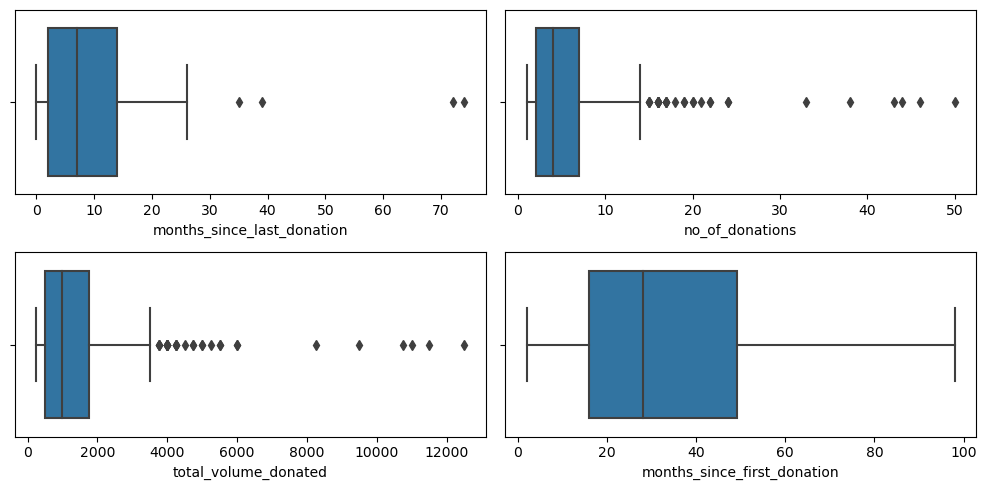

In [157]:
plt.figure(figsize=(10,5))
plotnumber=1

for i in df.drop('made_donation_in_march_2007',axis=1):
    plt.subplot(2,2,plotnumber)
    sns.boxplot(x=df[i])
    plotnumber=plotnumber+1
    
plt.tight_layout()


In [158]:
df.loc[df['no_of_donations']>30,'no_of_donations']=np.median(df.no_of_donations)

<Axes: >

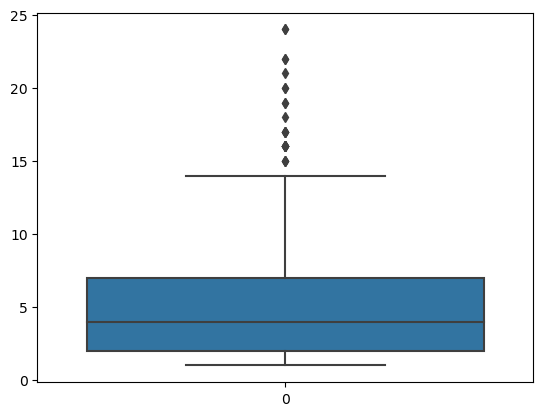

In [159]:
sns.boxplot(df.no_of_donations)

In [160]:
df.loc[df['total_volume_donated']>6000,'total_volume_donated']=np.median(df.total_volume_donated)

<Axes: >

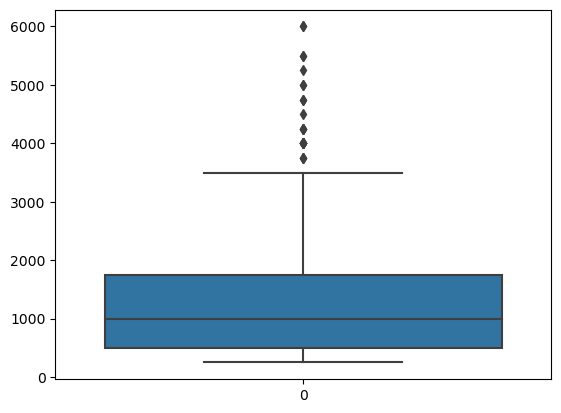

In [161]:
sns.boxplot(df.total_volume_donated)

### Scaling

   Now, we will normalize each numerical feature by using Standardscaler()

In [162]:
std=StandardScaler()

In [163]:
df[['months_since_last_donation', 'no_of_donations','total_volume_donated', 'months_since_first_donation']] = std.fit_transform(df[['months_since_last_donation', 'no_of_donations','total_volume_donated', 'months_since_first_donation']])
df.head()

,months_since_last_donation,no_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,-0.910739,-0.240590,-0.240590,2.641824,1
1,-1.155586,1.866196,1.866196,-0.249946,1
2,-1.033162,2.568457,2.568457,0.039231,1
3,-0.910739,3.504806,3.504806,0.452341,1
4,-1.033162,4.441155,4.441155,1.774293,0


## Feature Selection

<Axes: >

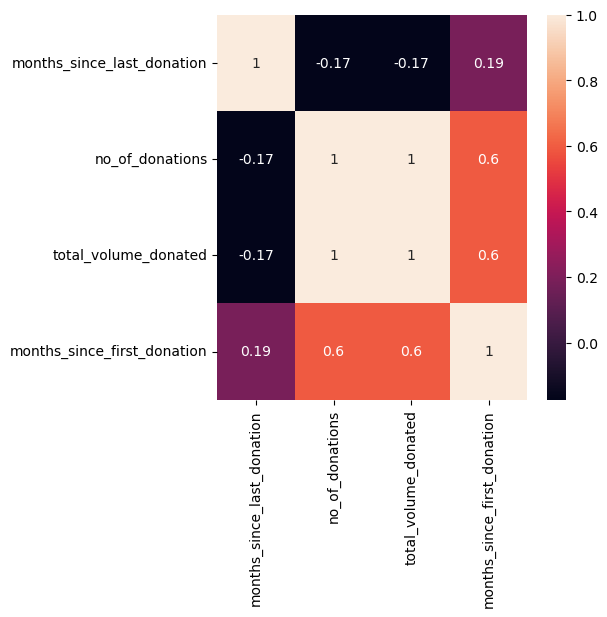

In [164]:
plt.figure(figsize=(5,5))
sns.heatmap(df.drop('made_donation_in_march_2007',axis = 1).corr(), annot=True)

No.of donations and Total volume donated columns are highly correlated. So we need to drop any one column.

In [165]:
df.drop('no_of_donations',axis=1,inplace=True)

In [166]:
df

,months_since_last_donation,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,-0.910739,-0.240590,2.641824,1
1,-1.155586,1.866196,-0.249946,1
2,-1.033162,2.568457,0.039231,1
3,-0.910739,3.504806,0.452341,1
4,-1.033162,4.441155,1.774293,0
...,...,...,...,...
571,1.660159,-0.942851,-0.456501,0
572,0.803193,-0.474677,2.146092,0
573,1.415311,-0.708764,0.741518,0
574,3.618938,-0.942851,0.204475,0


## Task - 2

## Model Creation

In [167]:
x = df.drop('made_donation_in_march_2007',axis = 1)
y = df.made_donation_in_march_2007
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [168]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 3)
(116, 3)
(460,)
(116,)


# Task - 3

## Model Evaluation

### Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [170]:
rf.fit(x_train,y_train)

RandomForestClassifier()

#### 1.Training 

In [171]:
y_pred_train_rf = rf.predict(x_train)
a1=accuracy_score(y_train,y_pred_train_rf)
a1

0.941304347826087

In [172]:
print(classification_report(y_train,y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       351
           1       0.90      0.84      0.87       109

    accuracy                           0.94       460
   macro avg       0.93      0.91      0.92       460
weighted avg       0.94      0.94      0.94       460



#### 2.Testing

In [173]:
y_pred_test_rf = rf.predict(x_test)
b1=accuracy_score(y_test,y_pred_test_rf)
b1

0.7241379310344828

In [174]:
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        87
           1       0.44      0.38      0.41        29

    accuracy                           0.72       116
   macro avg       0.62      0.61      0.61       116
weighted avg       0.71      0.72      0.72       116



In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [177]:
y_train.value_counts()

made_donation_in_march_2007
0    351
1    109
Name: count, dtype: int64

In [178]:
y_sm.value_counts()

made_donation_in_march_2007
0    351
1    351
Name: count, dtype: int64

In [179]:
rf1=RandomForestClassifier()

In [180]:
rf1.fit(x_sm,y_sm)

RandomForestClassifier()

In [181]:
y_pred=rf1.predict(x_test)

In [182]:
c1=accuracy_score(y_test,y_pred)
c1

0.7155172413793104

### SVM

In [183]:
from sklearn.svm import SVC
svc=SVC(
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None)

In [184]:
svc.fit(x_train,y_train)


SVC()

In [185]:
y_pred_train_svc=svc.predict(x_train)

In [186]:
a2=accuracy_score(y_train,y_pred_train_svc)
a2

0.7739130434782608

In [187]:
print(classification_report(y_train , y_pred_train_svc))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       351
           1       0.86      0.06      0.10       109

    accuracy                           0.77       460
   macro avg       0.81      0.53      0.49       460
weighted avg       0.79      0.77      0.69       460



In [188]:
print(confusion_matrix(y_train,y_pred_train_svc))

[[350   1]
 [103   6]]


In [189]:
y_pred_test_svc=svc.predict(x_test)

In [190]:
b2=accuracy_score(y_test,y_pred_test_svc)
b2

0.7586206896551724

In [191]:
print(classification_report(y_test,y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        87
           1       1.00      0.03      0.07        29

    accuracy                           0.76       116
   macro avg       0.88      0.52      0.46       116
weighted avg       0.82      0.76      0.66       116



In [192]:
print(confusion_matrix(y_test,y_pred_test_svc))

[[87  0]
 [28  1]]


In [193]:
svc1=SVC()

In [194]:
svc1.fit(x_sm,y_sm)

SVC()

In [195]:
y_pred=svc1.predict(x_test)

In [196]:
c2=accuracy_score(y_test,y_pred)
c2

0.7672413793103449

### Decision Tree

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
DT=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0)

In [199]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [200]:
y_pred_train_dt=DT.predict(x_train)

In [201]:
a3=accuracy_score(y_train,y_pred_train_dt)
a3

0.941304347826087

In [202]:
y_pred_test_dt=DT.predict(x_test)

In [203]:
b3=accuracy_score(y_test,y_pred_test_dt)
b3

0.6724137931034483

In [204]:
dt1=DecisionTreeClassifier()

In [205]:
dt1.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [206]:
y_pred=dt1.predict(x_test)

In [207]:
c3=accuracy_score(y_test,y_pred)
c3

0.6724137931034483

### KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [209]:
ERROR_RATE = []

for i in range(1,13):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate=(y_test != y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [210]:
ERROR_RATE

[0.29310344827586204,
 0.23275862068965517,
 0.25,
 0.22413793103448276,
 0.21551724137931033,
 0.20689655172413793,
 0.1810344827586207,
 0.21551724137931033,
 0.21551724137931033,
 0.19827586206896552,
 0.1896551724137931,
 0.20689655172413793]

Text(0.5, 1.0, 'K vs error_rate')

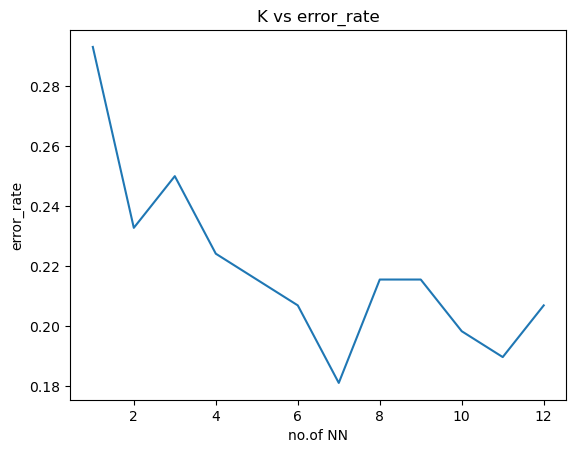

In [211]:
plt.plot(range(1,13),ERROR_RATE)
plt.xlabel('no.of NN')
plt.ylabel('error_rate')
plt.title('K vs error_rate')

In [212]:
knn1=KNeighborsClassifier(n_neighbors=7)

In [213]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [214]:
y_pred_train_knn=knn1.predict(x_train)

In [215]:
a4=accuracy_score(y_train,y_pred_train_knn)
a4

0.8195652173913044

In [216]:
y_pred_test_knn=knn1.predict(x_test)

In [217]:
b4=accuracy_score(y_test,y_pred_test_knn)
b4

0.8189655172413793

In [218]:
knn2=KNeighborsClassifier()


In [219]:
 knn2.fit(x_sm,y_sm)

KNeighborsClassifier()

In [220]:
y_pred=knn2.predict(x_test)

In [221]:
c4=accuracy_score(y_test,y_pred)
c4

0.7413793103448276

### XGB

In [222]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [223]:
from xgboost import XGBClassifier

In [224]:
xgb=XGBClassifier()

In [225]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [226]:
y_pred_train_xgb=xgb.predict(x_train)

In [227]:
a5=accuracy_score(y_train,y_pred_train_xgb)
a5

0.9282608695652174

In [228]:
y_pred_test_xgb=xgb.predict(x_test)

In [229]:
b5=accuracy_score(y_test,y_pred_test_xgb)
b5

0.7413793103448276

In [230]:
xgb1=XGBClassifier()

In [231]:
xgb1.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [232]:
y_pred=xgb1.predict(x_test)

In [233]:
c5=accuracy_score(y_test,y_pred)
c5

0.75

#### Predictions

In [234]:
predictions=pd.DataFrame({'model':['Random Forest','SVM','Decision Tree','KNN','XGB'] ,
                        'accuracy_score_train':[a1,a2,a3,a4,a5],
                      'accuracy_score_test':[b1,b2,b3,b4,b5],
                         'accuracy_score_smote_test':[c1,c2,c3,c4,c5]})

In [235]:
predictions

,model,accuracy_score_train,accuracy_score_test,accuracy_score_smote_test
0,Random Forest,0.941304,0.724138,0.715517
1,SVM,0.773913,0.758621,0.767241
2,Decision Tree,0.941304,0.672414,0.672414
3,KNN,0.819565,0.818966,0.741379
4,XGB,0.928261,0.741379,0.750000


From the above table we can observe that the models Random Forest, Decision Tree and XGB are overfitting so we will perform hyper parameter tunning 

## HyperParameter Tunning

### Random Forest

In [236]:
rf2 = RandomForestClassifier( n_estimators=150,
    criterion='entropy',
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)

In [237]:
rf2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       n_estimators=150)

In [238]:
y_pred_rf2 = rf2.predict(x_test)


In [239]:
accuracy_score(y_test,y_pred_rf2)

0.7758620689655172

In [240]:
from sklearn.model_selection import RandomizedSearchCV

In [241]:

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters


Fitting 3 folds for each of 100 candidates, totalling 300 fits


E:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "E:\New folder\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\New folder\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "E:\New folder\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\New folder\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in val

Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


In [242]:
d1=rf_best_params
d1

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [243]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30, bootstrap= True)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)#training 
y_predict=rf_clf2.predict(x_test)#testing


In [244]:
e1=accuracy_score(y_test,y_predict)
e1

0.7586206896551724

### Decision Tree

In [245]:
from sklearn.model_selection import GridSearchCV


In [246]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})


In [247]:
Best_parameters:({'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'best'})

In [248]:
d2=tree_cv.best_params_
d2

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [249]:
tree_cv.best_score_

0.4819584461850779

In [250]:
dt2=DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_leaf= 7, min_samples_split= 2, splitter= 'best')

In [251]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7)

In [252]:
y_pred=dt2.predict(x_test)

In [253]:
e2=accuracy_score(y_test,y_pred)
e2

0.7241379310344828

In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        87
           1       0.46      0.59      0.52        29

    accuracy                           0.72       116
   macro avg       0.65      0.68      0.66       116
weighted avg       0.75      0.72      0.73       116



In [255]:
confusion_matrix(y_test,y_pred)

array([[67, 20],
       [12, 17]], dtype=int64)

### XGB

In [256]:
param_grid={
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.3],
    'n_estimators':[100,200,300],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.8,0.9,1.0],
    'gamma':[0.1,0.2,0.3],
    'reg_alpha':[0.1,0.2,0.3],
    'reg_lambda':[0.1,0.2,0.3]
}


In [257]:
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)

In [258]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0.1, 0.2, 0.3],
                         'reg_lambda': [0.1, 0.2, 0.3],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [259]:
d3=grid_search.best_params_
d3

{'colsample_bytree': 1.0,
 'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_alpha': 0.2,
 'reg_lambda': 0.2,
 'subsample': 1.0}

In [260]:
grid_search.best_score_

0.7804347826086957

In [261]:
grid_search1=XGBClassifier(colsample_bytree = 1.0,gamma= 0.2,learning_rate= 0.3,max_depth= 5,n_estimators=100,reg_alpha= 0.2,reg_lambda= 0.2,subsample=1.0)

In [262]:
grid_search1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [263]:
y_pred=grid_search1.predict(x_test)

In [264]:
e3=accuracy_score(y_test,y_pred)
e3

0.7844827586206896

In [265]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        87
           1       0.58      0.52      0.55        29

    accuracy                           0.78       116
   macro avg       0.71      0.70      0.70       116
weighted avg       0.78      0.78      0.78       116



In [266]:
hyperparameter_predictions=pd.DataFrame({'model':['Random Forest','Decision Tree','XGB'] ,
                        'best params':[d1,d2,d3],
                      'accuracy_score_test':[e1,e2,e3],
                         })

In [267]:
hyperparameter_predictions

,model,best params,accuracy_score_test
0,Random Forest,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.758621
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.724138
2,XGB,"{'colsample_bytree': 1.0, 'gamma': 0.2, 'learn...",0.784483


In [268]:
predictions

,model,accuracy_score_train,accuracy_score_test,accuracy_score_smote_test
0,Random Forest,0.941304,0.724138,0.715517
1,SVM,0.773913,0.758621,0.767241
2,Decision Tree,0.941304,0.672414,0.672414
3,KNN,0.819565,0.818966,0.741379
4,XGB,0.928261,0.741379,0.750000
